In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [3]:
from sklearn.metrics import confusion_matrix , classification_report, accuracy_score

In [4]:
titanic=pd.read_csv('/content/Titanic-Dataset.csv')

In [5]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [7]:
titanic.describe(include='all')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Braund, Mr. Owen Harris",male,NaN,NaN,NaN,347082,NaN,B96 B98,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


In [8]:
titanic.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [9]:
titanic.duplicated().sum()

0

In [10]:
sex_counts=titanic['Sex'].value_counts()
sex_counts

male      577
female    314
Name: Sex, dtype: int64

<ipython-input-11-43b64d439b97>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sex_counts.index,y=sex_counts.values,palette='viridis')


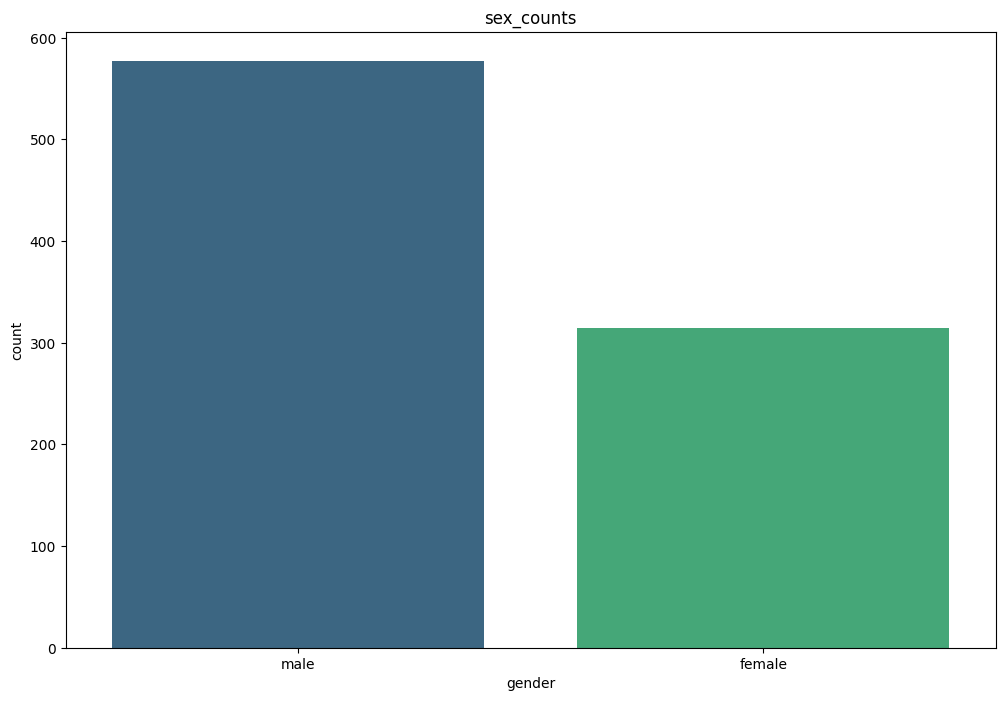

In [11]:
plt.figure(figsize=(12,8))
sns.barplot(x=sex_counts.index,y=sex_counts.values,palette='viridis')
plt.title('sex_counts')
plt.xlabel('gender')
plt.ylabel('count')
plt.show()

<ipython-input-12-34d737069bed>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=age_counts.index, y=age_counts.values,palette='viridis')


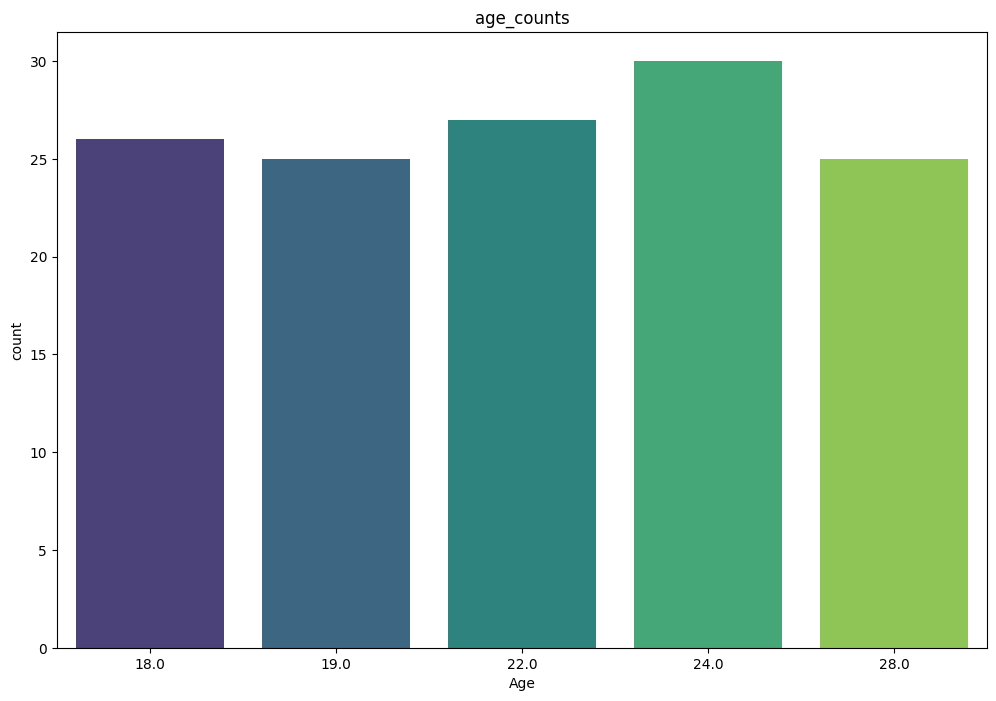

24.0    30
22.0    27
18.0    26
19.0    25
28.0    25
Name: Age, dtype: int64

In [12]:
age_counts=titanic['Age'].value_counts().head()

plt.figure(figsize=(12,8))
sns.barplot(x=age_counts.index, y=age_counts.values,palette='viridis')
plt.title('age_counts')
plt.xlabel('Age')
plt.ylabel('count')
plt.show()
age_counts

In [13]:
pclass_counts=titanic['Pclass'].value_counts()
pclass_counts

3    491
1    216
2    184
Name: Pclass, dtype: int64

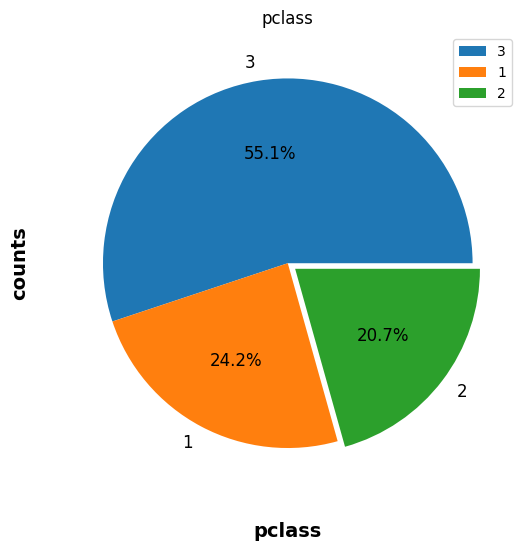

In [14]:
plt.figure(figsize = (20,6))
explode = (0,0,0.05)
pclass_counts.plot(kind = 'pie', fontsize = 12 , explode = explode, autopct = '%.1f%%')
plt.title('pclass')
plt.xlabel('pclass', weight = 'bold', color = "#000000", fontsize = 14, labelpad = 20)
plt.ylabel('counts', weight = 'bold', color = "#000000", fontsize = 14, labelpad = 20)
plt.legend(labels = pclass_counts.index, loc = "best")
plt.show()

In [15]:
sibSp_counts=titanic['SibSp'].value_counts
sibSp_counts

<bound method IndexOpsMixin.value_counts of 0      1
1      1
2      0
3      1
4      0
      ..
886    0
887    0
888    1
889    0
890    0
Name: SibSp, Length: 891, dtype: int64>

In [16]:
Parch_counts=titanic['Parch'].value_counts()
Parch_counts

0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64

<ipython-input-17-d61db49dd9d8>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=Parch_counts.index,y=Parch_counts.values,palette='viridis')


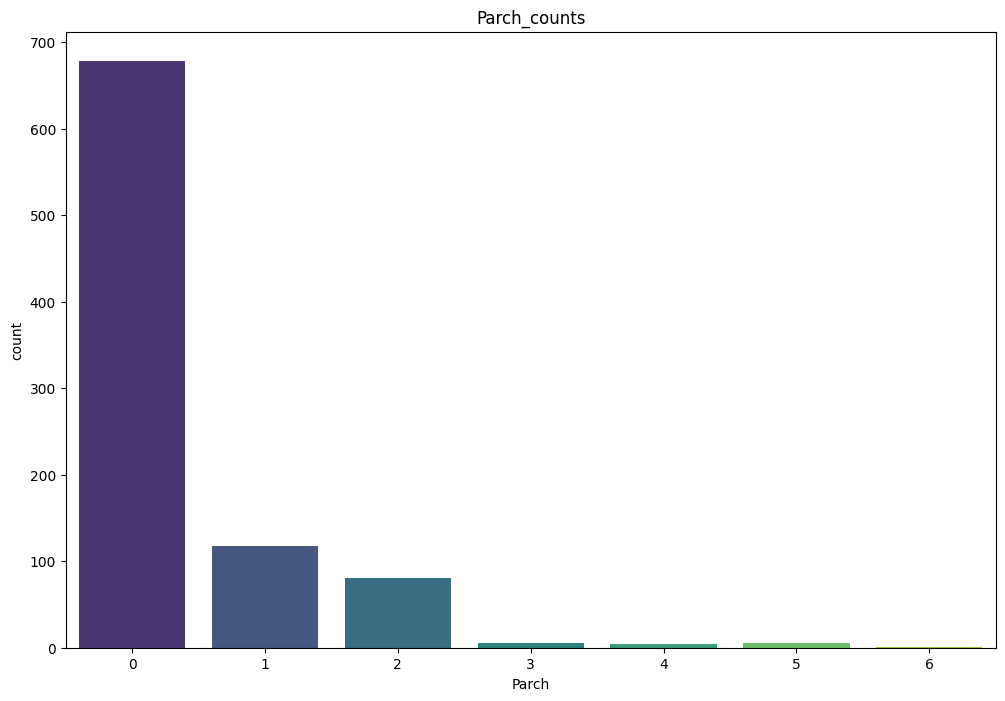

In [17]:
plt.figure(figsize=(12,8))
sns.barplot(x=Parch_counts.index,y=Parch_counts.values,palette='viridis')
plt.title('Parch_counts')
plt.xlabel('Parch')
plt.ylabel('count')
plt.show()

In [18]:
Embarked_counts=titanic['Embarked'].value_counts
Embarked_counts

<bound method IndexOpsMixin.value_counts of 0      S
1      C
2      S
3      S
4      S
      ..
886    S
887    S
888    S
889    C
890    Q
Name: Embarked, Length: 891, dtype: object>

In [19]:
Survived_counts=titanic['Survived'].value_counts()
Survived_counts

0    549
1    342
Name: Survived, dtype: int64

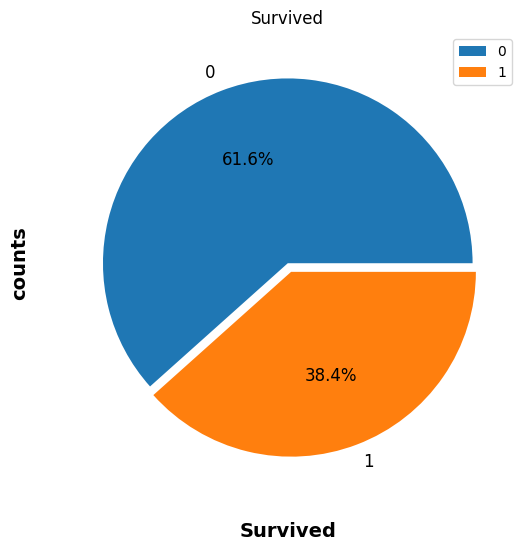

In [20]:
plt.figure(figsize = (20, 6))
explode = (0,0.05)
Survived_counts.plot(kind = 'pie', fontsize = 12, explode = explode, autopct = '%.1f%%')
plt.title('Survived')
plt.xlabel('Survived', weight = "bold", color = "#000000", fontsize = 14, labelpad = 20)
plt.ylabel('counts', weight = "bold", color = "#000000", fontsize = 14, labelpad = 20)
plt.legend(labels = Survived_counts.index, loc = "best")
plt.show()

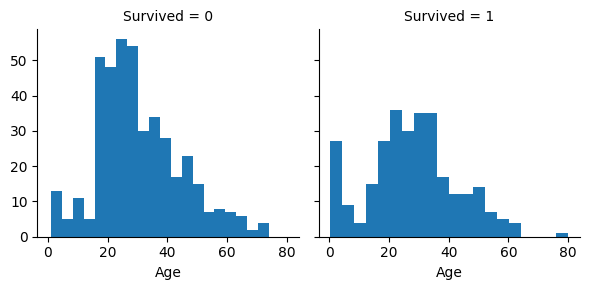

In [21]:
age=sns.FacetGrid(titanic,col='Survived')
age.map(plt.hist,'Age',bins=20)

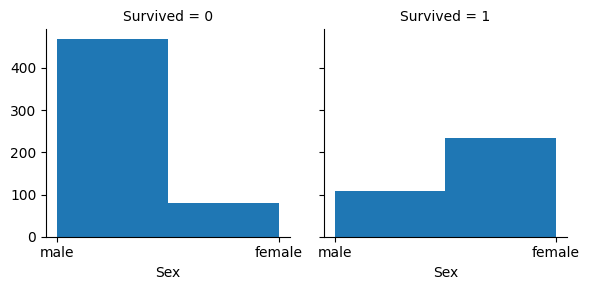

In [22]:
gender=sns.FacetGrid(titanic,col='Survived')
gender.map(plt.hist,'Sex',bins=2)

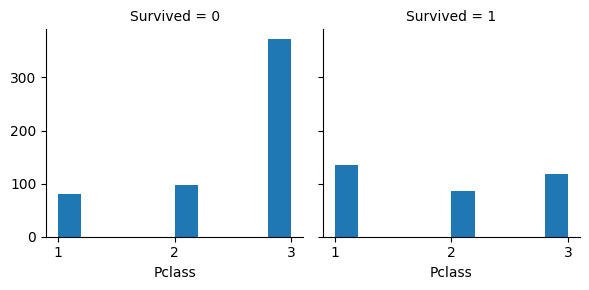

In [23]:
pclass=sns.FacetGrid(titanic,col='Survived')
plt.xticks([1,2,3])
pclass.map(plt.hist,'Pclass')

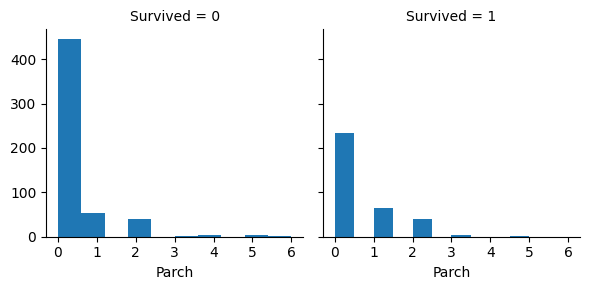

In [24]:
pclass=sns.FacetGrid(titanic,col='Survived')
plt.xticks(Parch_counts.index)
pclass.map(plt.hist,'Parch')

In [25]:
titanic=titanic.drop(columns=['PassengerId','Name','Cabin','Ticket'],axis=1)
titanic.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [26]:
titanic['Sex']=titanic['Sex'].replace({'male':1,'female':0})
titanic.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,S
1,1,1,0,38.0,1,0,71.2833,C
2,1,3,0,26.0,0,0,7.9250,S
3,1,1,0,35.0,1,0,53.1000,S
4,0,3,1,35.0,0,0,8.0500,S


In [27]:
titanic['Age'].fillna(titanic['Age'].median(), inplace=True)
titanic.isna().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    2
dtype: int64

In [28]:
titanic['Embarked'].fillna(titanic['Embarked'].mode()[0], inplace=True)
titanic.isna().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [29]:
titanic['Embarked']=titanic['Embarked'].replace({'S':1,'C':2,'Q':3})
titanic.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,1
1,1,1,0,38.0,1,0,71.2833,2
2,1,3,0,26.0,0,0,7.9250,1
3,1,1,0,35.0,1,0,53.1000,1
4,0,3,1,35.0,0,0,8.0500,1


In [30]:
titanic.corr()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
Survived,1.000000,-0.338481,-0.543351,-0.064910,-0.035322,0.081629,0.257307,0.106811
Pclass,-0.338481,1.000000,0.131900,-0.339898,0.083081,0.018443,-0.549500,0.045702
Sex,-0.543351,0.131900,1.000000,0.081163,-0.114631,-0.245489,-0.182333,-0.116569
Age,-0.064910,-0.339898,0.081163,1.000000,-0.233296,-0.172482,0.096688,-0.009165
SibSp,-0.035322,0.083081,-0.114631,-0.233296,1.000000,0.414838,0.159651,-0.059961
Parch,0.081629,0.018443,-0.245489,-0.172482,0.414838,1.000000,0.216225,-0.078665
Fare,0.257307,-0.549500,-0.182333,0.096688,0.159651,0.216225,1.000000,0.062142
Embarked,0.106811,0.045702,-0.116569,-0.009165,-0.059961,-0.078665,0.062142,1.000000


In [31]:
import seaborn as sns

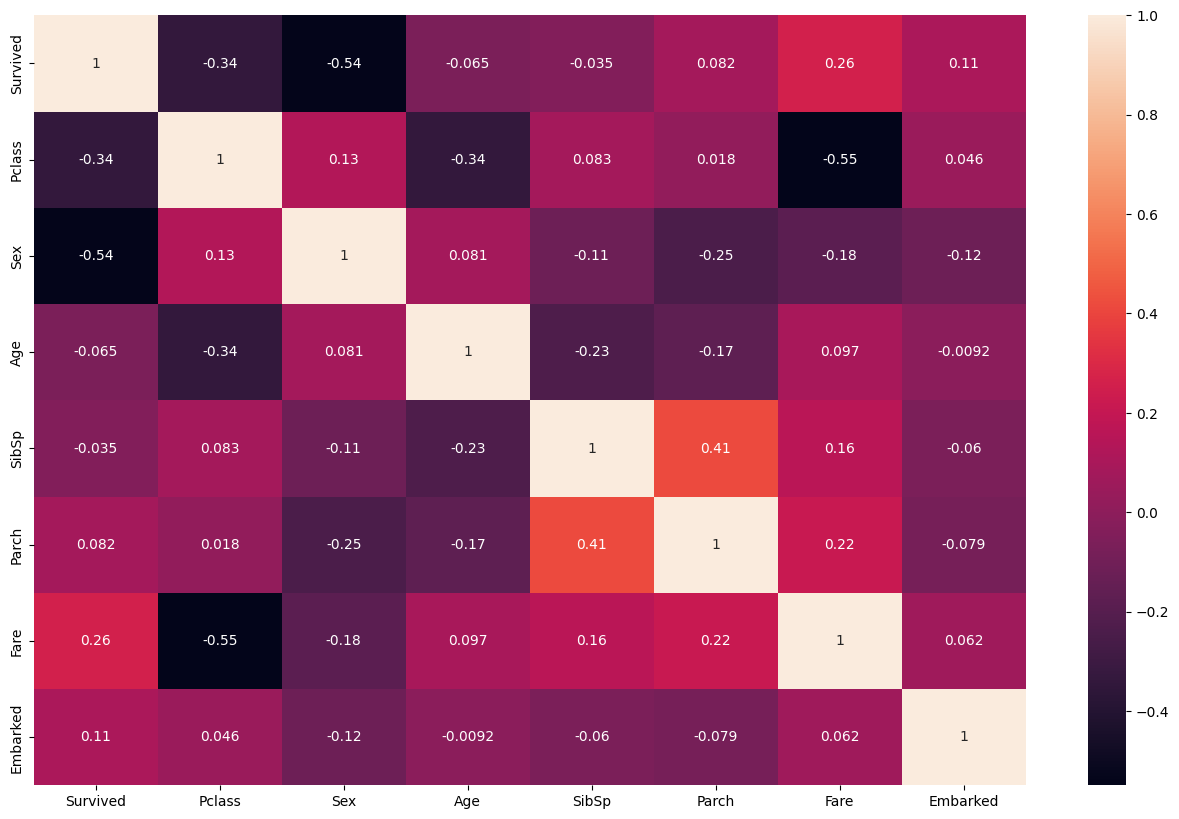

In [32]:
plt.figure(figsize=(16,10))
sns.heatmap(titanic.corr(), annot=True)
plt.show()

In [33]:
x=titanic.drop(columns=['Survived'])
y=titanic['Survived']

In [34]:
scaler=MinMaxScaler()
x=scaler.fit_transform(x)

In [35]:
y=y.values.reshape(-1,1)

In [36]:
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.2,shuffle=True,random_state=42)

In [37]:
lg=LogisticRegression(penalty="l2",max_iter=1000,solver="lbfgs")
lg.fit(X_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(max_iter=1000)

In [38]:
lg.score(X_train,y_train)

0.8019662921348315

In [39]:
y_pred=lg.predict(X_test)

In [40]:
print(accuracy_score(y_test,y_pred))

0.7988826815642458


[[90 15]
 [21 53]]


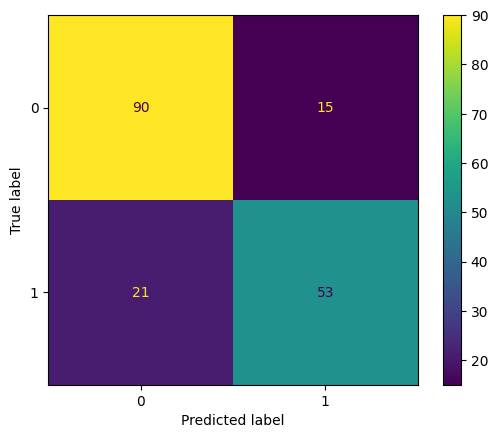

In [41]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
print(confusion_matrix(y_test, y_pred))

In [42]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.81      0.86      0.83       105
           1       0.78      0.72      0.75        74

    accuracy                           0.80       179
   macro avg       0.80      0.79      0.79       179
weighted avg       0.80      0.80      0.80       179



In [43]:
Dt=DecisionTreeClassifier()
Dt.fit(X_train,y_train)

DecisionTreeClassifier()

In [44]:
Dt.score(X_train,y_train)


0.9789325842696629

In [45]:
y_pred=Dt.predict(X_test)

In [46]:
print(accuracy_score(y_test,y_pred))

0.7821229050279329


[[84 21]
 [18 56]]


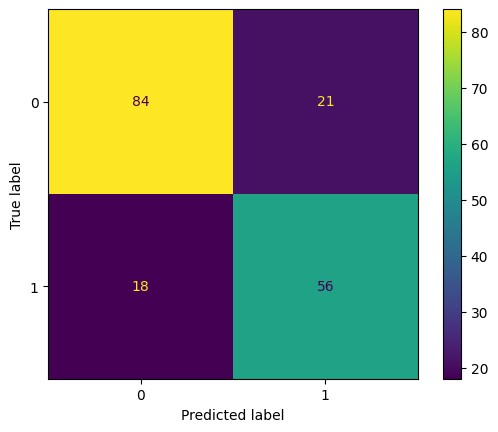

In [47]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_predictions(y_test,y_pred)
print(confusion_matrix(y_test, y_pred))

In [48]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.82      0.80      0.81       105
           1       0.73      0.76      0.74        74

    accuracy                           0.78       179
   macro avg       0.78      0.78      0.78       179
weighted avg       0.78      0.78      0.78       179



In [49]:
Rf=RandomForestClassifier(n_estimators=1000)
Rf.fit(X_train,y_train)

<ipython-input-49-4b9e9484e953>:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  Rf.fit(X_train,y_train)


RandomForestClassifier(n_estimators=1000)

In [50]:
Rf.score(X_train,y_train)

0.9789325842696629

In [51]:
y_pred=Rf.predict(X_test)

In [52]:
print(accuracy_score(y_test, y_pred))

0.8156424581005587


[[90 15]
 [18 56]]


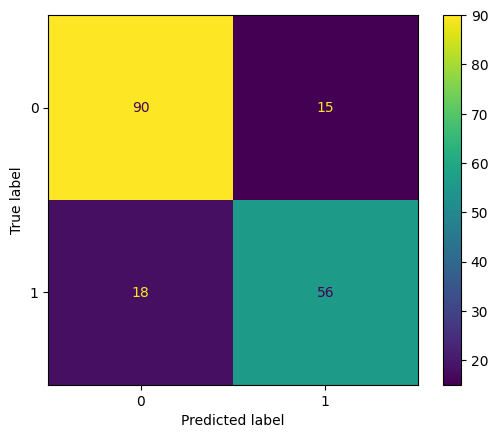

In [53]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_predictions(y_test,y_pred)
print(confusion_matrix(y_test,y_pred))

In [54]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.86      0.85       105
           1       0.79      0.76      0.77        74

    accuracy                           0.82       179
   macro avg       0.81      0.81      0.81       179
weighted avg       0.81      0.82      0.82       179



In [55]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(5)
knn.fit(X_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier()

In [56]:
knn.score(X_train,y_train)


0.8581460674157303

In [57]:
pred=knn.predict(X_test)


In [58]:
print(accuracy_score(y_test,y_pred))

0.8156424581005587


[[90 15]
 [18 56]]


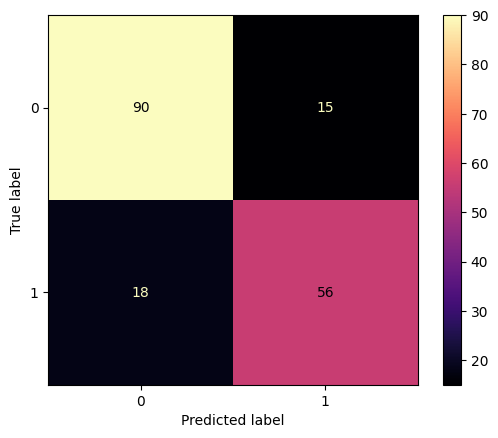

In [59]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_predictions(y_test, y_pred,cmap="magma")
print(confusion_matrix(y_test, y_pred))